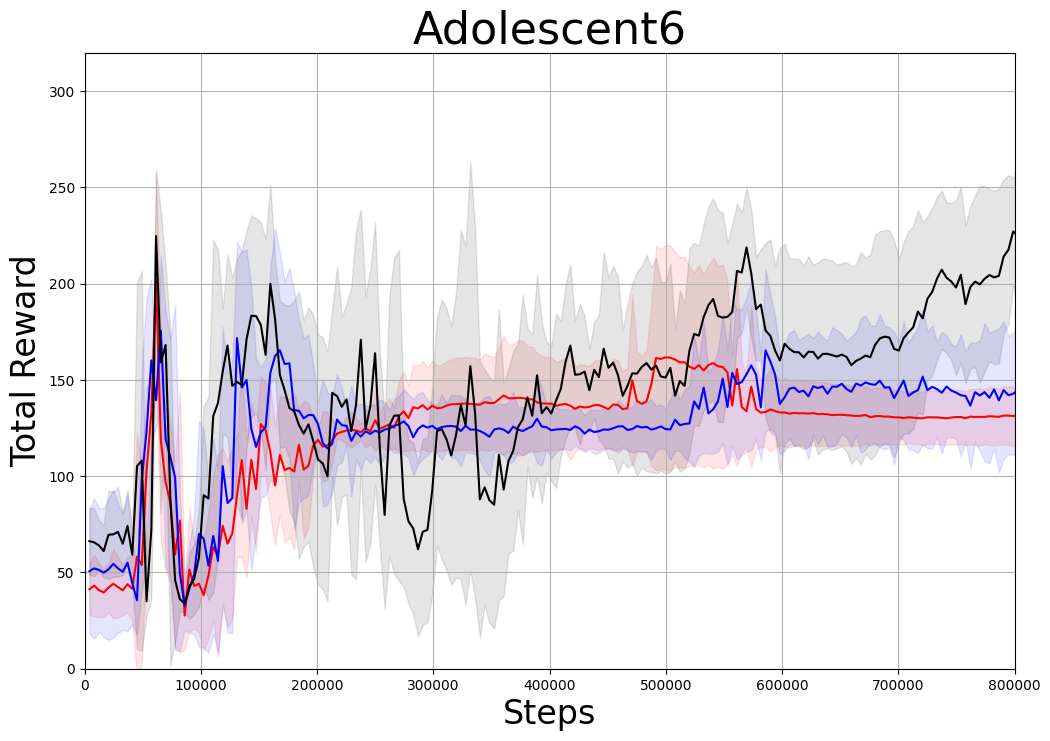

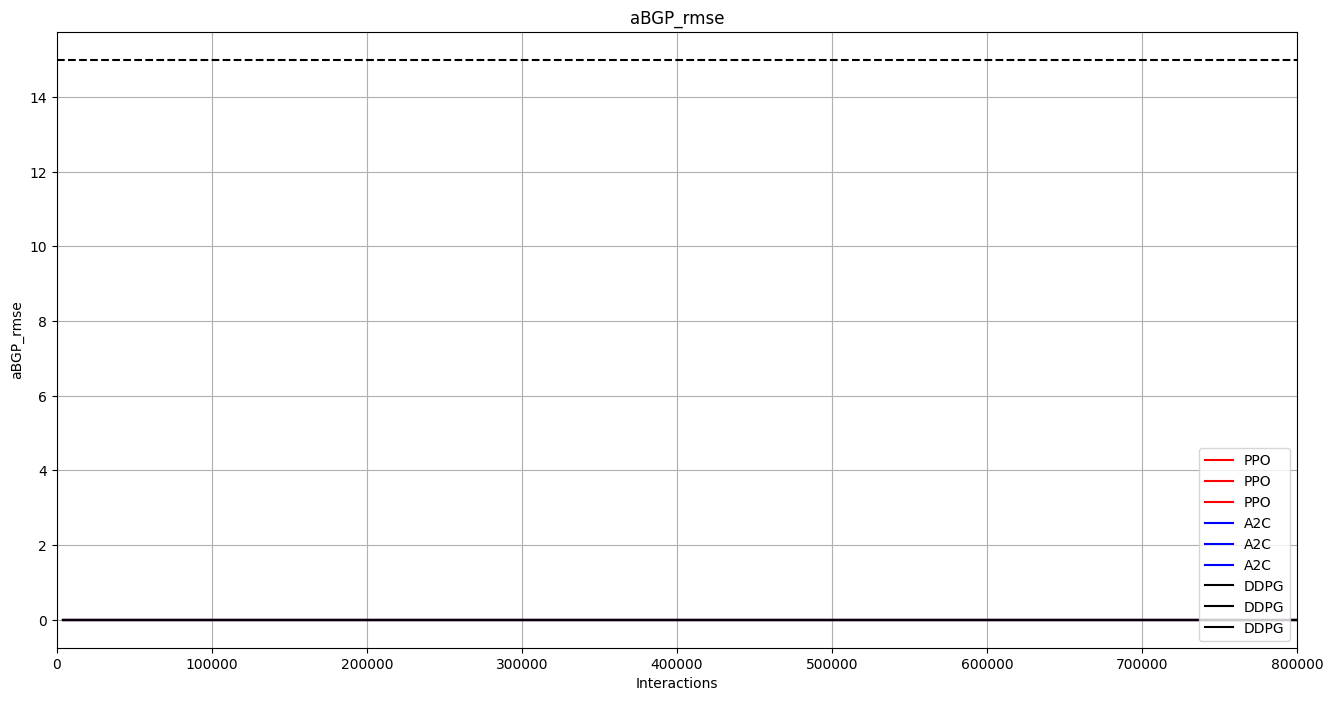

In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
# MAIN_PATH = config('MAIN_PATH')
MAIN_PATH = '/home/chirath/Documents/sys_control/sys_control/'
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 


SUBJECT = '6'
t = 'Adolescent'+'6'#SUBJECT

# PATH1 = '/NCI_Results/PPO/P'+SUBJECT
# PATH2 = '/NCI_Results/A2C/A2C'+SUBJECT
# PATH3 = '/NCI_Results/DDPG/DDPG'+SUBJECT
# PATH4 = '/NCI_Results/SAC/SAC'+SUBJECT
# PATH5 = '/NCI_Results/TD3/TD3'+SUBJECT

#Algo Comparison with/wiuthout penalty
# PATH1 = '/EU59 Experiments/DDPG/model1/ou_noise/with_penalty/std1e0/TD3'+SUBJECT
# PATH2 = '/EU59 Experiments/TD3/model1/ou_noise/with_penalty/std2e-1/TD3'+SUBJECT
# PATH3 = '/EU59 Experiments/TD3/model1/ou_noise/with_penalty/std5e-2/TD3'+SUBJECT

#Penalty sensitivity
# PATH1 = 'EU59Experiments/DDPG/model1/normal_dist/no_penalty/std1e0/DDPG'+SUBJECT
# PATH2 = 'EU59Experiments/DDPG/model1/normal_dist/no_penalty/std2e-1/DDPG'+SUBJECT
# PATH3 = 'EU59Experiments/DDPG/model1/normal_dist/no_penalty/std5e-2/DDPG'+SUBJECT

#DPG Algorithm Comparison
# PATH1 = 'adolescent/PPO/P'+SUBJECT
# PATH2 = 'EU59 Experiments/DPG/model1/normal_dist/no_penalty/std2e-1/DPG'+SUBJECT# Patient 0
# PATH2 = 'EU59 Experiments/DPG/model1/normal_dist/no_penalty/std5e-2/DPG'+SUBJECT# Patient 2
# PATH2 = 'EU59 Experiments/DPG/model1/normal_dist/no_penalty/std5e-2/DPG'+SUBJECT# Patient 6

# PATH3 = '/EU59 Experiments/DPG/model1/ou_noise/with_penalty/std1e0/DPG'+SUBJECT# Patient 0
# PATH3 = '/EU59 Experiments/DPG/model1/ou_noise/with_penalty/std2e-1/DPG'+SUBJECT# Patient 2
# PATH3 = '/EU59 Experiments/DPG/model1/ou_noise/with_penalty/std2e-1/DPG'+SUBJECT# Patient 6


# PATH3 = 'adolescent/SAC/SAC'+SUBJECT

#DDPG Algorithm Comparison
# PATH1 = 'adolescent/PPO/P'+SUBJECT
# PATH2 = 'EU59Experiments/DDPG/model1/normal_dist/no_penalty/std1e0/DDPG'+SUBJECT# Patient 0
# PATH2 = 'EU59Experiments/DDPG/model1/normal_dist/no_penalty/std1e0/DDPG'+SUBJECT# Patient 2
# PATH2 = 'EU59Experiments/DDPG/model1/normal_dist/no_penalty/std1e0/DDPG'+SUBJECT# Patient 6

# PATH3 = '/EU59 Experiments/DDPG/model1/ou_noise/with_penalty/std1e0/DDPG'+SUBJECT# Patient 0
# PATH3 = '/EU59 Experiments/DDPG/model1/ou_noise/with_penalty/std1e0/DDPG'+SUBJECT# Patient 2
# PATH3 = '/EU59 Experiments/DDPG/model1/normal_dist/with_penalty/std1e0/DDPG'+SUBJECT# Patient 6

# # 
# PATH4 = 'adolescent/SAC/SAC'+SUBJECT

#TD3 Algorithm Comparison
PATH1 = '/Best_Models/Best_TD3/TD3'+SUBJECT
# PATH2 = 'EU59 Experiments/TD3/model1/normal_dist/no_penalty/std5e-2/TD3'+SUBJECT# Patient 0
# PATH2 = 'EU59 Experiments/TD3/model1/ou_noise/no_penalty/std5e-2/TD3'+SUBJECT# Patient 2
PATH2 = '/PER_Hyperparameter_BestModels/Proportion_'+SUBJECT+'/TD3'+SUBJECT# Patient 6
PATH3 = '/PER_Hyperparameter_BestModels/Rank_'+SUBJECT+'/TD3'+SUBJECT# Patient 6

#TD3 Algorithm Comparison - PER Adult
PATH1 = '/adult/TD3_Random/TD3'+SUBJECT
# PATH2 = 'EU59 Experiments/TD3/model1/normal_dist/no_penalty/std5e-2/TD3'+SUBJECT# Patient 0
# PATH2 = 'EU59 Experiments/TD3/model1/ou_noise/no_penalty/std5e-2/TD3'+SUBJECT# Patient 2
PATH2 = '/Revised_PER_Study/Proportional_26/TD3/alpha_05/beta_075/TD3'+SUBJECT# Patient 6
PATH3 = '/Revised_PER_Study/Rank_26/TD3/alpha_075/beta_075/TD3'+SUBJECT# Patient 6

#TD3 Algorithm Evolution
PATH1 = '/Evolution/Baseline_6/TD3'+SUBJECT
# PATH2 = 'EU59 Experiments/TD3/model1/normal_dist/no_penalty/std5e-2/TD3'+SUBJECT# Patient 0
# PATH2 = 'EU59 Experiments/TD3/model1/ou_noise/no_penalty/std5e-2/TD3'+SUBJECT# Patient 2
PATH2 = '/Evolution/Pentalty_6/TD3'+SUBJECT# Patient 6
PATH3 = '/Evolution/PER_6/TD3'+SUBJECT# Patient 6

# PATH3 = '/EU59 Experiments/TD3/model1/ou_noise/with_penalty/std5e-2/TD3'+SUBJECT# Patient 0
# PATH3 = '/EU59 Experiments/TD3/model1/ou_noise/with_penalty/std1e0/TD3'+SUBJECT# Patient 2
# PATH3 = '/EU59 Experiments/TD3/model1/normal_dist/with_penalty/std5e-2/TD3'+SUBJECT# Patient 6
# 
# PATH5 = 'adolescent/SAC/SAC'+SUBJECT

exp1 = ExperimentVisualise(id=PATH1+'_1', version=1.1, plot_version=1, test_seeds=5000)
exp2 = ExperimentVisualise(id=PATH1+'_2', version=1.1, plot_version=1, test_seeds=5000)
exp3 = ExperimentVisualise(id=PATH1+'_3', version=1.1, plot_version=1, test_seeds=5000)
exp4 = ExperimentVisualise(id=PATH2+'_1', version=1.1, plot_version=1, test_seeds=5000)
exp5 = ExperimentVisualise(id=PATH2+'_2', version=1.1, plot_version=1, test_seeds=5000)
exp6 = ExperimentVisualise(id=PATH2+'_3', version=1.1, plot_version=1, test_seeds=5000)
exp7 = ExperimentVisualise(id=PATH3+'_1', version=1.1, plot_version=1, test_seeds=5000)
exp8 = ExperimentVisualise(id=PATH3+'_2', version=1.1, plot_version=1, test_seeds=5000)
exp9 = ExperimentVisualise(id=PATH3+'_3', version=1.1, plot_version=1, test_seeds=5000)
# exp10 = ExperimentVisualise(id=PATH4+'_1', version=1.1, plot_version=1, test_seeds=5000)
# exp11 = ExperimentVisualise(id=PATH4+'_2', version=1.1, plot_version=1, test_seeds=5000)
# exp12 = ExperimentVisualise(id=PATH4+'_3', version=1.1, plot_version=1, test_seeds=5000)
# exp13 = ExperimentVisualise(id=PATH5+'_1', version=1.1, plot_version=1, test_seeds=5000)
# exp14 = ExperimentVisualise(id=PATH5+'_2', version=1.1, plot_version=1, test_seeds=5000)
# exp15 = ExperimentVisualise(id=PATH5+'_3', version=1.1, plot_version=1, test_seeds=5000)

# plot the graphs
command = []
dis_len = 0.8 * 1000000
disp_arr = display_commands_v2(command)
exp_vis = {
            '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":'PPO'}, 
            '2':{ "id":exp2, "color":'r',"show": disp_arr[2], "label":'PPO'},  
            '3':{ "id":exp3, "color":'r',"show": disp_arr[3], "label":'PPO'}, 
            '4':{ "id":exp4, "color":'b',"show": disp_arr[4], "label":'A2C'},  
            '5':{ "id":exp5, "color":'b',"show": disp_arr[5], "label":'A2C'}, 
            '6':{ "id":exp6, "color":'b',"show": disp_arr[6], "label":'A2C'},  
            '7':{ "id":exp7, "color":'k',"show": disp_arr[7], "label":'DDPG'}, 
            '8':{ "id":exp8, "color":'k',"show": disp_arr[8], "label":'DDPG'},
            '9':{ "id":exp9, "color":'k',"show": disp_arr[9], "label":'DDPG'},
            # '10':{ "id":exp10, "color":'k',"show": disp_arr[10], "label":'DDPG'}, 
            # '11':{ "id":exp11, "color":'k',"show": disp_arr[11], "label":'DDPG'},
            # '12':{ "id":exp12, "color":'k',"show": disp_arr[12], "label":'DDPG'},
            # '13':{ "id":exp13, "color":'k',"show": disp_arr[13], "label":'DDPG'}, 
            # '14':{ "id":exp14, "color":'k',"show": disp_arr[14], "label":'DDPG'},
            # '15':{ "id":exp15, "color":'k',"show": disp_arr[15], "label":'DDPG'},
}
groups = [ ['1', '2', '3'], ['4', '5', '6'], ['7', '8', '9']]  
# groups = [ ['1', '2', '3'], ['4', '5', '6'], ['7', '8', '9'], ['10', '11', '12']]  # 
# groups = [ ['1', '2', '3'], ['4', '5', '6'], ['7', '8', '9'], ['10', '11', '12'], ['13', '14', '15']]  # 




plot_testing_average_metric(exp_vis, groups, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True, title=t)
  
    
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='aBGP_rmse', goal=15, fill=False)

In [14]:
#print(exp1.get_testing_metric(metric='reward', type='normal'))
from visualiser.core import create_file_paths

groups = [ ['1', '2', '3'],  ['4', '5', '6'], ['7', '8', '9']]
algo = ['P', 'A', 'G']

def plot_testing_average_metric(dict, groups, metric):
    for groupings in range(0, len(groups)):
        FILES = []
        for i in groups[groupings]:  # exp's inside the group
            # will give the exp list
            path, seeds, filename = dict[i]['id'].get_file_paths()
            FILES = create_file_paths(path, seeds, filename, FILES)
        cur_length, full_arr, refined = [], [], []
        for file in FILES:
            reward_summary = pd.read_csv(file)
            cur_length.append(reward_summary.shape[0])
            full_arr.append(reward_summary[metric])
        for x in full_arr:
            refined.append(x[0:min(cur_length)])
        data = pd.concat(refined, axis=1)
        data['mean'] = data.mean(axis=1)

        data['std_dev'] = data.std(axis=1)
        data['mean_plusstd'] = data['mean'] + data['std_dev']  # * 2
        data['mean_std'] = data['mean'] - data['std_dev']  # * 2
        data['max'] = data.max(axis=1)
        data['min'] = data.min(axis=1)
        data['steps'] = np.arange(len(data))
        data['steps'] = (data['steps'] + 1) * dict[i]['id'].training_workers * dict[i]['id'].args['n_step']
        summary_pdf = data[['steps','mean', 'std_dev', 'mean_plusstd', 'mean_std', 'max', 'min']]
        print(summary_pdf)
        print(t+'_'+algo[groupings]+'_'+metric+'.csv')
        summary_pdf.to_csv('data/'+t+'_'+algo[groupings]+'_'+metric+'.csv')

metrics = ['reward', 'normo', 'ri', 'hgbi', 'lgbi', 'aBGP_rmse']
for m in metrics:        
    plot_testing_average_metric(exp_vis, groups, metric=m)


      steps        mean    std_dev  mean_plusstd    mean_std         max  \
0      4096   18.334307   6.491701     24.826008   11.842606   42.635150   
1      8192   19.106020   7.292666     26.398686   11.813355   39.319157   
2     12288   19.675235   8.098168     27.773403   11.577067   37.787334   
3     16384   20.318406   7.616152     27.934557   12.702254   53.495040   
4     20480   22.996129   8.777386     31.773516   14.218743   47.744610   
..      ...         ...        ...           ...         ...         ...   
191  786432  280.922511   2.820848    283.743358  278.101663  285.108150   
192  790528  277.900822  29.677459    307.578281  248.223363  307.578281   
193  794624  281.295426   2.360123    283.655549  278.935303  285.129850   
194  798720  276.771441  33.647948    310.419389  243.123493  310.419389   
195  802816  279.724878  19.791755    299.516634  259.933123  299.516634   

           min  
0     4.286768  
1     7.292666  
2     4.237278  
3     5.486456  
4 

PermissionError: [Errno 13] Permission denied: 'data/Adolescent0_P_reward.csv'


 Experiment summary...
{'epi': {195: 197}, 't': {195: 168}, 'reward': {195: 99.38904}, 'normo': {195: 22.61904761904762}, 'hypo': {195: 0.0}, 'sev_hypo': {195: 0.0}, 'hyper': {195: 26.785714285714285}, 'lgbi': {195: 0.0}, 'hgbi': {195: 40.818634}, 'ri': {195: 40.818634}, 'sev_hyper': {195: 50.595238095238095}, 'aBGP_rmse': {195: 0}, 'cBGP_rmse': {195: 0}}
{'epi': {195: 197}, 't': {195: 166}, 'reward': {195: 98.833145}, 'normo': {195: 19.27710843373494}, 'hypo': {195: 0.0}, 'sev_hypo': {195: 0.0}, 'hyper': {195: 32.53012048192771}, 'lgbi': {195: 0.0}, 'hgbi': {195: 40.440933}, 'ri': {195: 40.440933}, 'sev_hyper': {195: 48.19277108433735}, 'aBGP_rmse': {195: 0}, 'cBGP_rmse': {195: 0}}
{'epi': {195: 197}, 't': {195: 168}, 'reward': {195: 98.989655}, 'normo': {195: 20.23809523809524}, 'hypo': {195: 0.0}, 'sev_hypo': {195: 0.0}, 'hyper': {195: 29.761904761904763}, 'lgbi': {195: 0.0}, 'hgbi': {195: 41.056232}, 'ri': {195: 41.056232}, 'sev_hyper': {195: 50.0}, 'aBGP_rmse': {195: 0}, 'cBGP_rm

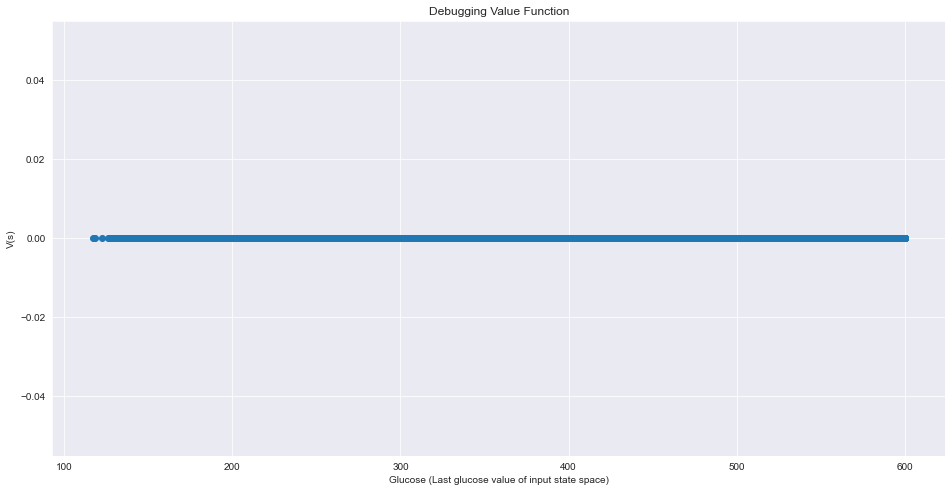

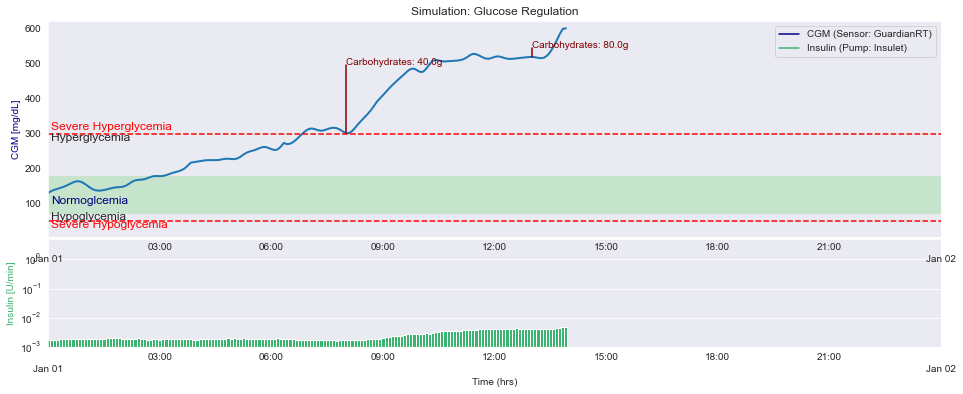

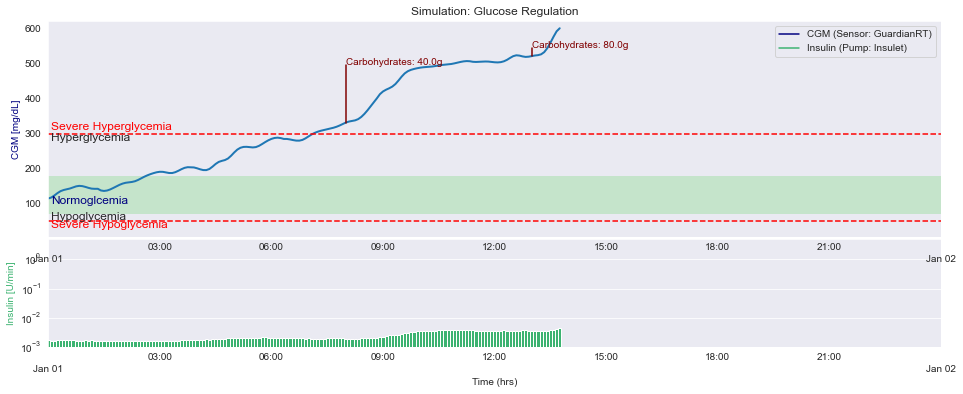

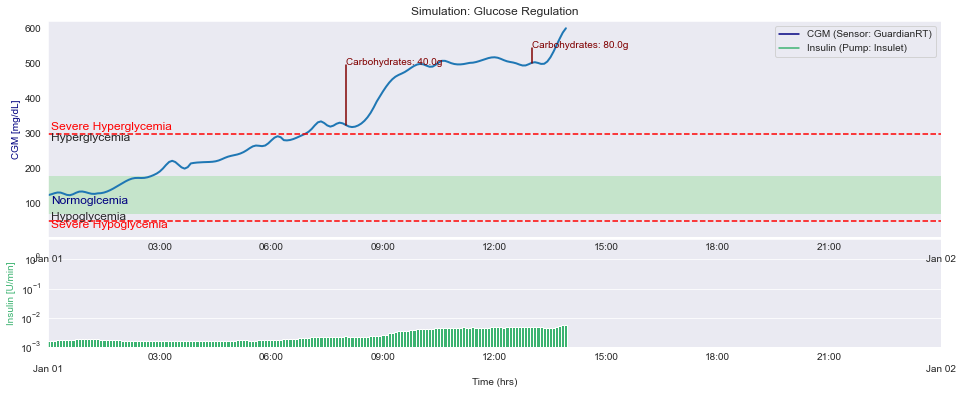

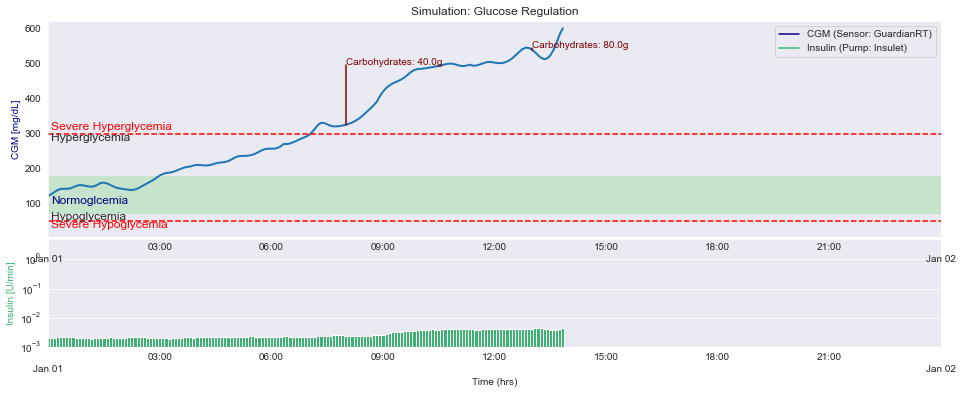

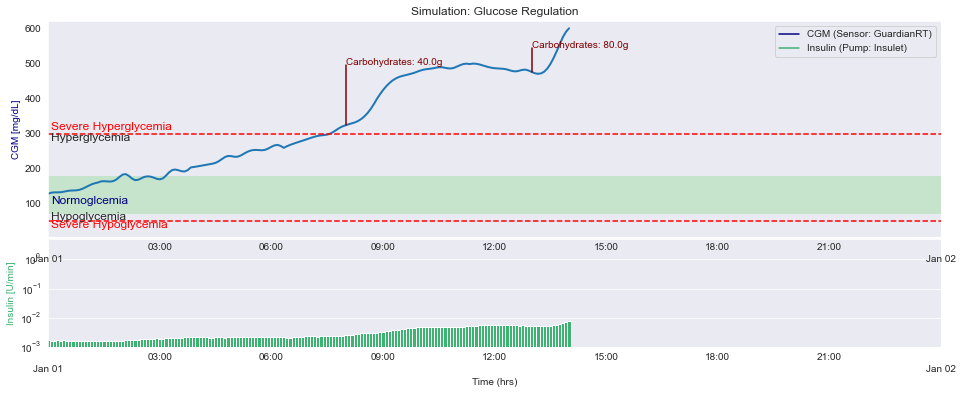

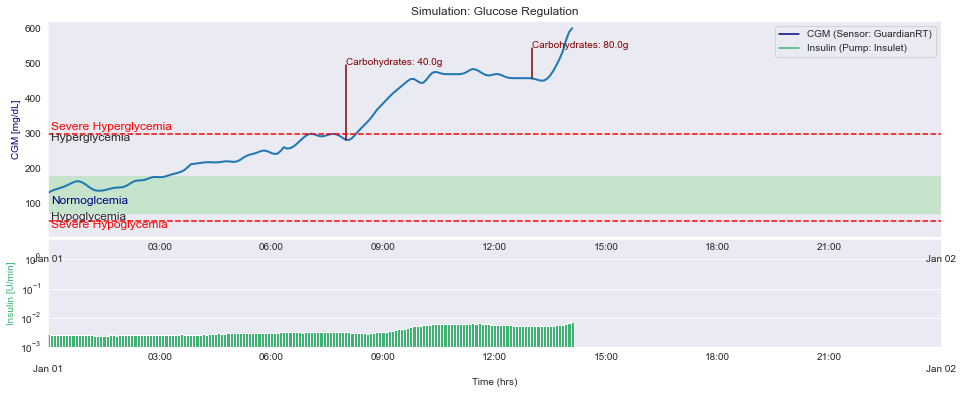

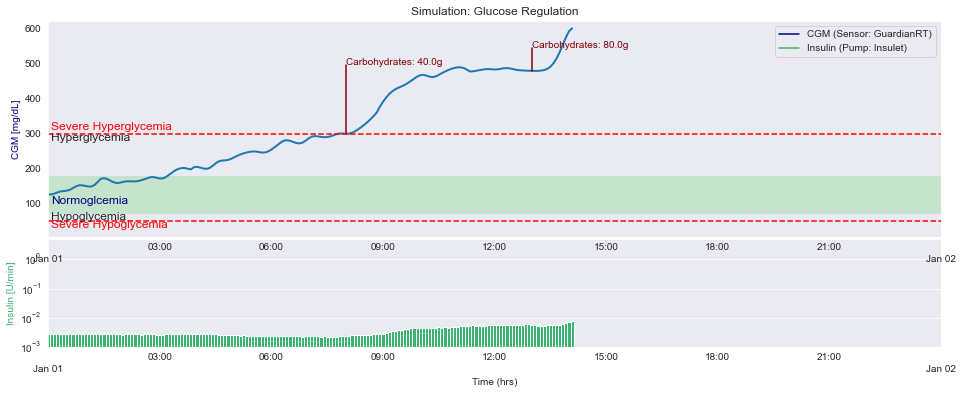

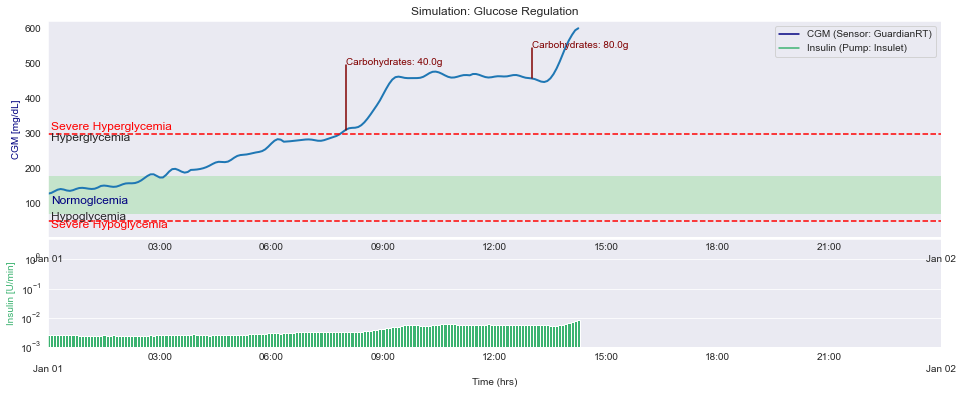

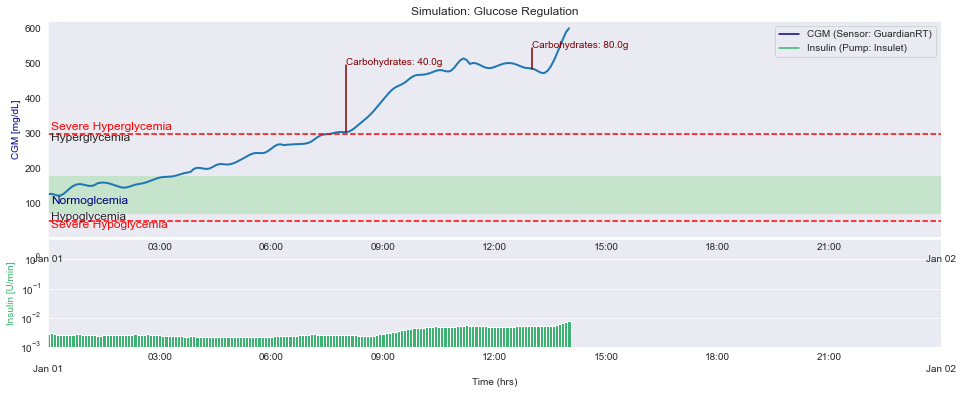

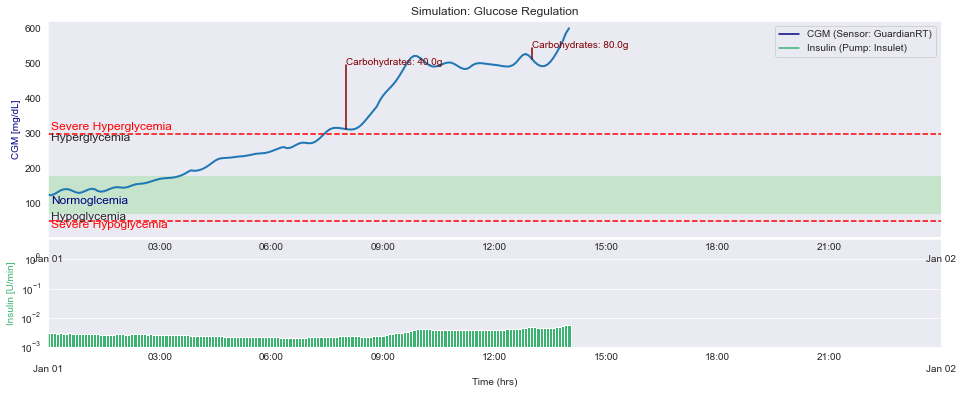

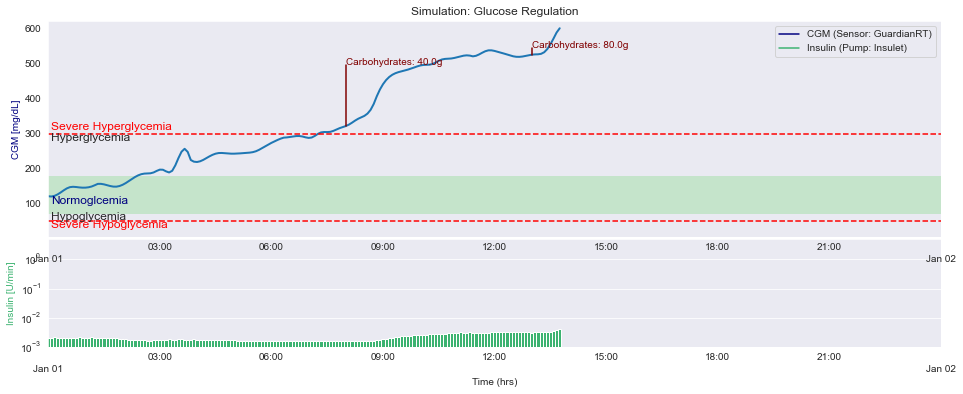

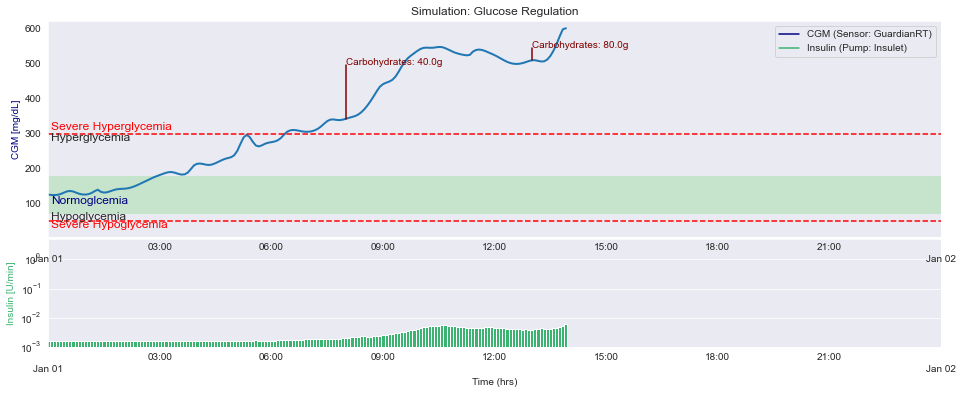

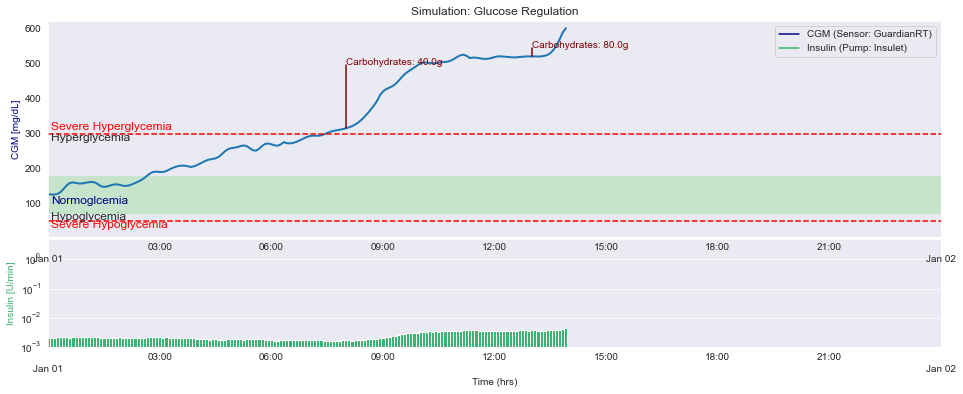

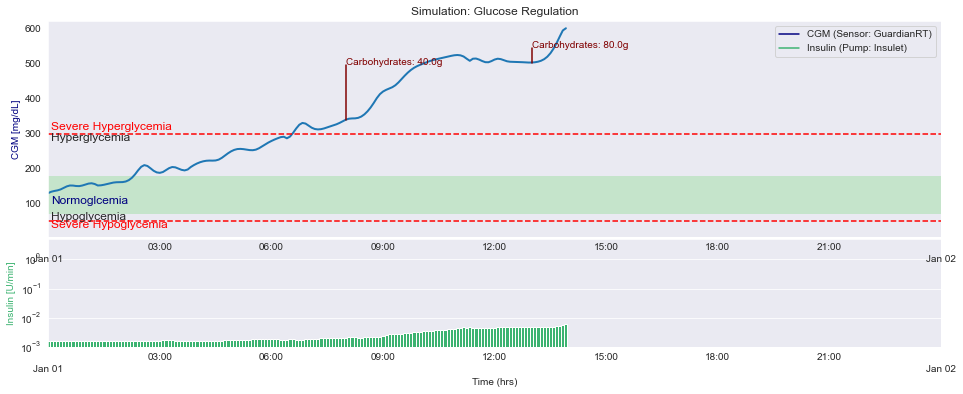

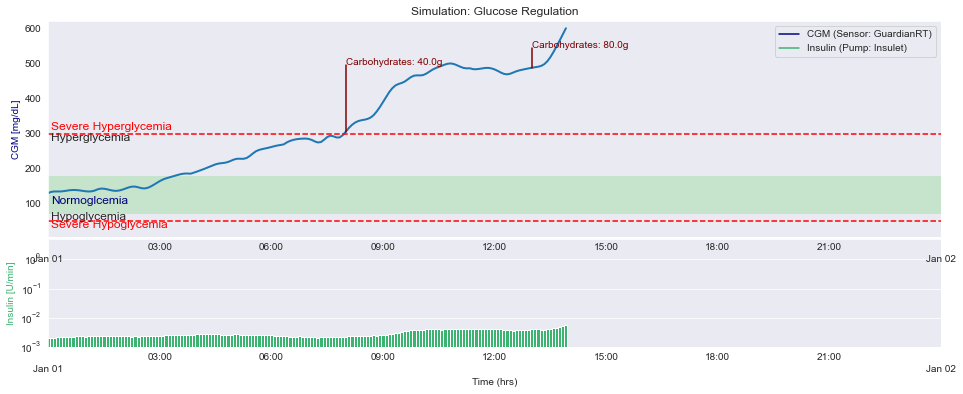

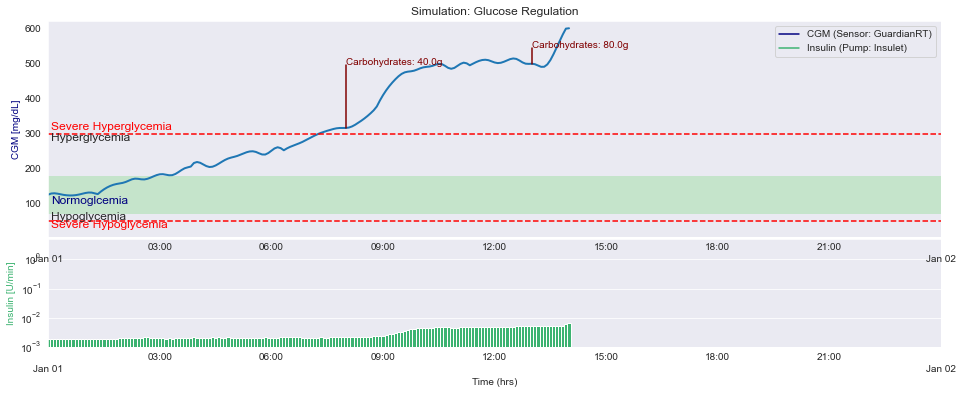

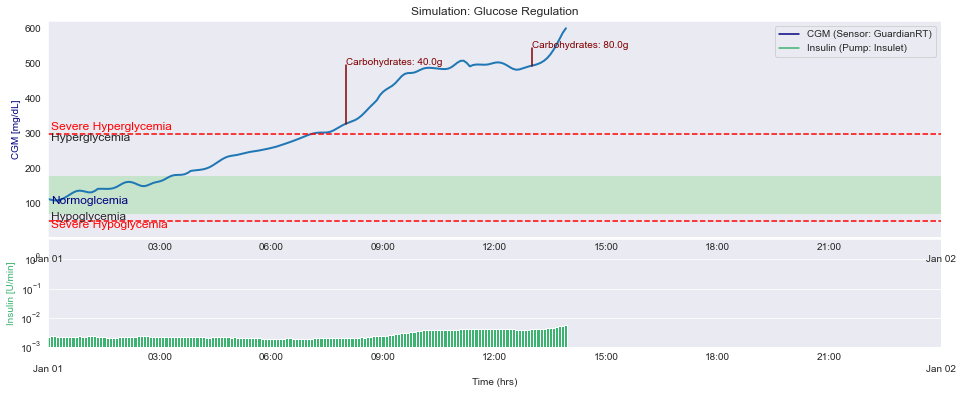

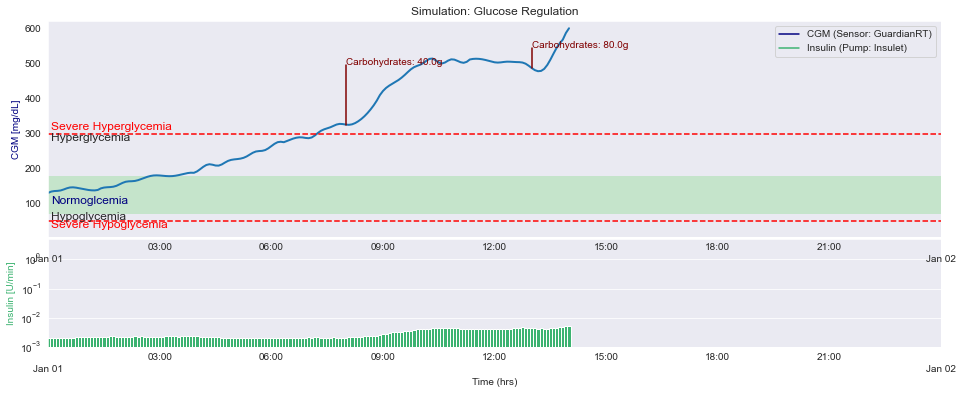

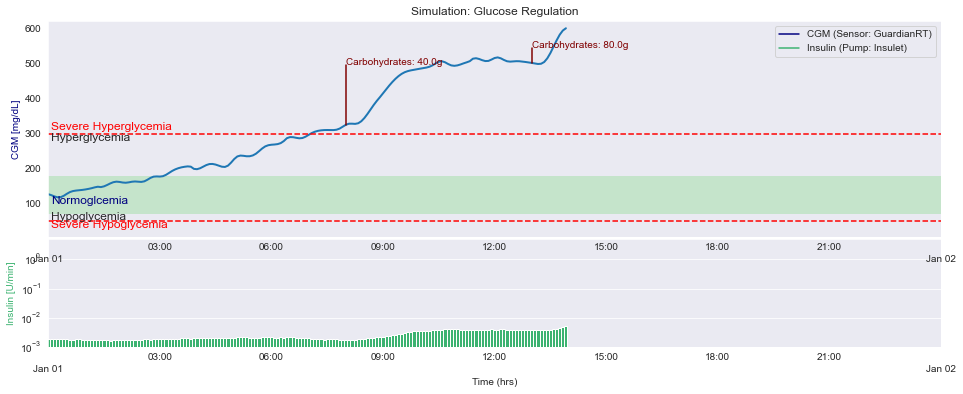

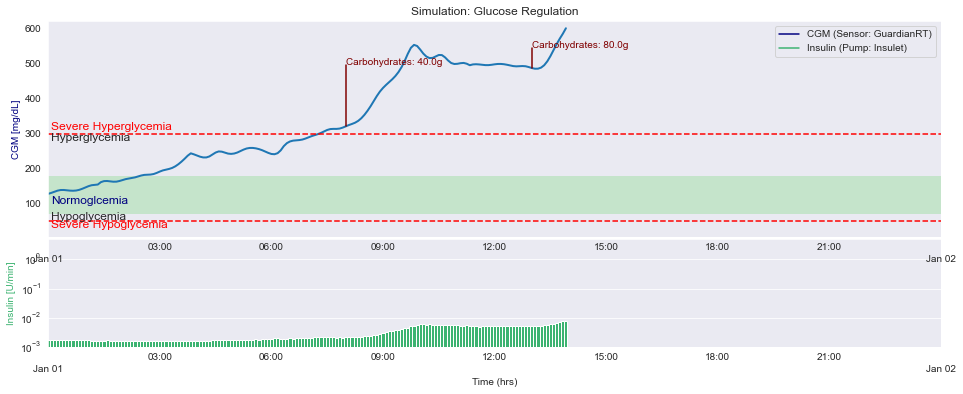

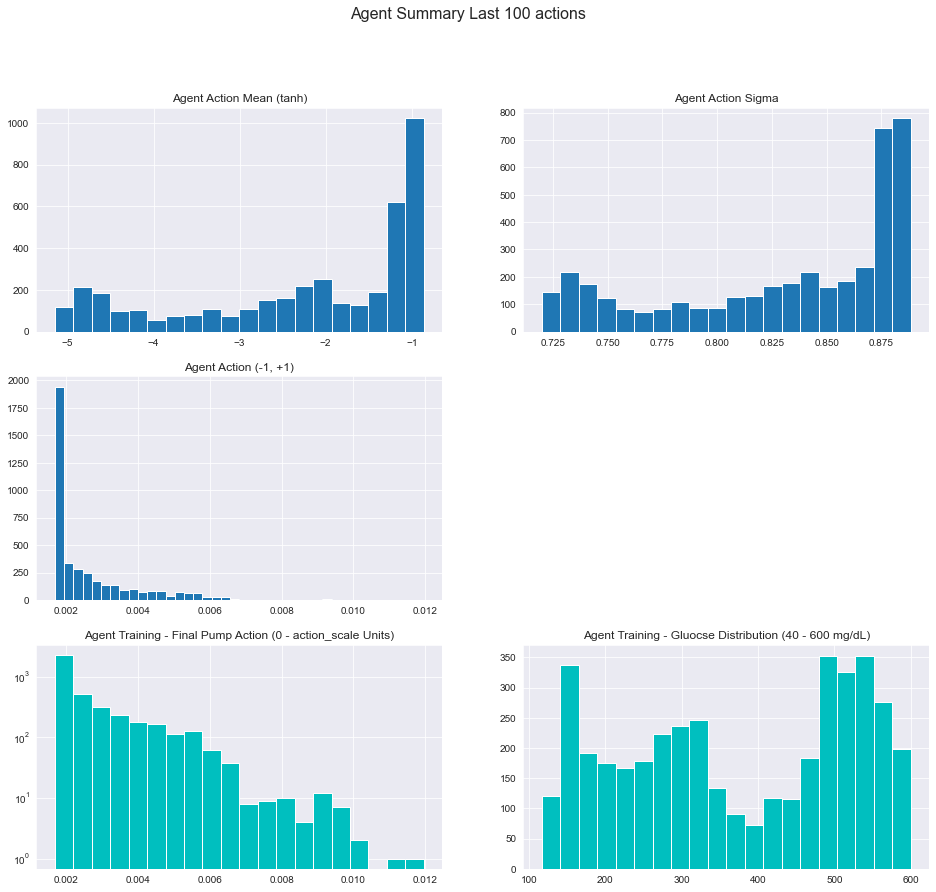

In [18]:
## debugging a given experimentset_args
target_exp = exp7
latest_epi = target_exp.get_summary()
target_epi = latest_epi
plot_value_function(target_exp, horizon=256)
for t in range(0, target_exp.testing_workers):
    plot_episode(target_exp, tester=t, episode=target_epi)
plot_training_action_summary(target_exp, horizon=256)

In [370]:
# stats for the RL agent

import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = '/home/users/u7041472/chirath/sys_control/'
sys.path.insert(1, MAIN_PATH)


def calc_stats(res, metric):
    target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
    failures = res[res['t'] < 312].count()['t']
    res = res[res['t'] == 312]  # only the completed simulations for calc
    res = res[target_metrics].describe().loc[metric]
    res['fail'] = failures
    target_metrics.append('fail')
    res = res[target_metrics].round(2) 
    return res
    
    
# nov22_embc_A1_avg    

n_trials = 1000
subjects = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
#subjects = ['A1', 'A3', 'A4', 'A6', 'A7', 'A9', 'A10']
cohort, summary_stats = [], []
for s in subjects:
    data = []
    FOLDER_PATH='/results/dec14_embc_'+s+'_avg/testing/data'
    for i in range(0, n_trials):
        test_i = 'testing_episode_summary_'+str(6000+i)+'.csv'
        df = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+test_i)
        data.append(df)
    res = pd.concat(data)
    res['PatientID'] = s
    summary_stats.append(res)
    
    print(s)
    print(calc_stats(res, metric=['mean', 'min', 'max']))
    
    res = calc_stats(res, metric=['mean'])   # 'min', 'max'
    res['exp'] = s
    cohort.append(res)
 
full = pd.concat(cohort)
full.set_index('exp', inplace=True)
sum_stats = pd.concat(summary_stats)

print(full)
r = calc_stats(sum_stats, metric=['mean', 'min', 'max'])
print(r)

A1
      normo   hypo  hyper  sev_hypo  sev_hyper   lgbi   hgbi     ri  fail
mean  64.05   1.57  31.46      0.07       2.85   2.01   9.71  11.72    15
min   31.73   0.00   0.00      0.00       0.00   0.00   2.04   3.76    15
max   96.15  24.04  63.46      5.45      22.12  11.96  20.16  24.90    15
A2
       normo   hypo  hyper  sev_hypo  sev_hyper  lgbi   hgbi     ri  fail
mean   69.89   0.45  29.01      0.01       0.64  1.11   7.59   8.71     7
min    36.54   0.00   0.00      0.00       0.00  0.00   1.56   2.08     7
max   100.00  12.50  60.26      3.53      13.14  8.68  16.05  18.41     7
A3
      normo   hypo  hyper  sev_hypo  sev_hyper   lgbi   hgbi     ri  fail
mean  69.15   2.61  22.24      0.26       5.74   2.52  10.54  13.06   139
min   33.65   0.00   0.00      0.00       0.00   0.00   2.50   4.00   139
max   91.35  21.15  49.36      8.01      21.15  16.46  24.45  32.92   139
A4
      normo   hypo  hyper  sev_hypo  sev_hyper   lgbi   hgbi     ri  fail
mean  66.00   4.76  21.47 

In [99]:
def cohort_stats(FOLDER_PATH, control_type='real', individual_stats=False):
    arr = []
    print('Summary stats for {}'.format(control_type))
    manual_control = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
    target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
    
    
    failures = manual_control[manual_control['survival'] < 312].count()['survival']
    
    #print('Number of Catestrophic failures: {}'.format(failures))

    filered_manual_control = manual_control[manual_control['survival'] == 312]    
    t_cohort = filered_manual_control[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
    #print(manual_control[target_metrics].describe())
    t_cohort['failure'] = failures
    t_cohort['subject'] = 1000
    arr.append(t_cohort)
    
    if individual_stats:
        #print('\n##################Individual Stats#######################')
        for subject_id in range(20, 30):
            print('\nSubject ID: {}'.format(subject_id))
            subject = manual_control.loc[manual_control['PatientID'] == subject_id]
            failures = subject[subject['survival'] < 312].count()['survival']
            
            subject = subject[subject['survival'] == 312]    
            #t_sub = subject[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
            t_sub = subject[target_metrics].describe().loc[['mean']]
            t_sub['failure'] = failures
            t_sub['subject'] = subject_id
            print('Number of Catestrophic failures: {}'.format(failures))
            arr.append(t_sub)
            print(t_sub)


    final = pd.concat(arr)
    final['mode'] = control_type
    #print(final)
    #final.to_csv(control_type+'.csv')
    return final
        
FOLDER_PATH='/results/embc14_real'    
f1 = cohort_stats(FOLDER_PATH, control_type='real', individual_stats=True)

FOLDER_PATH='/results/embc14_quadratic'    
f2 = cohort_stats(FOLDER_PATH, control_type='quadratic', individual_stats=True)
#full = pd.concat([f1, f2])
#print(full)
#full.to_csv('full_results_manual_control.csv')


Summary stats for real

Subject ID: 20
Number of Catestrophic failures: 36
          normo      hypo      hyper  sev_hypo  sev_hyper      lgbi      hgbi  \
mean  69.102764  2.315738  28.054181  0.121356   0.405961  2.384251  7.587342   

            ri  failure  subject  
mean  9.971593       36       20  

Subject ID: 21
Number of Catestrophic failures: 3
          normo     hypo     hyper  sev_hypo  sev_hyper      lgbi      hgbi  \
mean  90.103644  0.25686  9.599311  0.006108   0.034077  0.844296  3.384868   

            ri  failure  subject  
mean  4.229164        3       21  

Subject ID: 22
Number of Catestrophic failures: 55
          normo      hypo      hyper  sev_hypo  sev_hyper      lgbi      hgbi  \
mean  70.826889  2.551214  26.055827  0.181794   0.384276  3.067901  7.419369   

            ri  failure  subject  
mean  10.48727       55       22  

Subject ID: 23
Number of Catestrophic failures: 14
          normo      hypo      hyper  sev_hypo  sev_hyper      lgbi      hg

real
690
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   71.053131   2.187724  24.952614   0.332676   1.473854   2.864151   
std    12.890716   3.592842  10.296977   1.084217   5.112085   3.235323   
min     8.860760   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  30.769230  71.551730  16.959064  80.590710  22.051207   

           hgbi         ri  
mean   7.620674  10.484825  
std    3.924464   6.169289  
min    1.789013   1.845144  
max   57.820187  76.844830  
quadratic
328
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   69.360132   1.064259  27.490189   0.161047   1.924372   1.790704   
std    12.350792   2.620374  10.311082   0.791841   5.182413   2.688906   
min     9.282701   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  22.115385  69.551285  14.705882  80.590710  22.915808   

           hgbi         ri  
mean   8.071870   9.862574  
std    3.850129   5.74

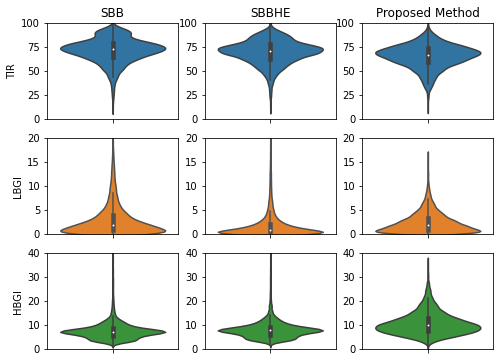

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns


filter_bad = False

target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
FOLDER_PATH='/results/embc14_real'
control_type = 'real'
f1 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f1[f1['survival'] < 312].count()['survival']
print('real')
print(failures)
if filter_bad:
    f1 = f1[f1['survival'] == 312]
t1 = f1[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t1)

FOLDER_PATH='/results/embc14_quadratic'
control_type = 'quadratic'
f2 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f2[f2['survival'] < 312].count()['survival']
print('quadratic')
print(failures)
if filter_bad:
    f2 = f2[f2['survival'] == 312]
t2 = f2[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t2)

if filter_bad:
    sum_stats = sum_stats[sum_stats['t'] == 312]
c = sns.color_palette() 

fig = plt.figure(figsize=(8, 6))
plt.subplot(3, 3, 1)
g2 = sns.violinplot(y=f1['normo'])
g2.set(ylabel="TIR")
g2.set(ylim=(0, 100))
plt.title("SBB")

plt.subplot(3, 3, 2)
g2 = sns.violinplot(y=f2['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("SBBHE")
#plt.ylabel()

plt.subplot(3, 3, 3)
g2 = sns.violinplot(y=sum_stats['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("Proposed Method")

plt.subplot(3, 3, 4)
g2 = sns.violinplot(y=f1['lgbi'], color=c[1])
g2.set(ylabel="LBGI")
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 5)
g2 = sns.violinplot(y=f2['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 6)
g2 = sns.violinplot(y=sum_stats['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 7)
g2 = sns.violinplot(y=f1['hgbi'], color=c[2])
g2.set(ylabel="HBGI")
g2.set(ylim=(0, 40))


plt.subplot(3, 3, 8)
g2 = sns.violinplot(y=f2['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

plt.subplot(3, 3, 9)
g2 = sns.violinplot(y=sum_stats['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

# sns.violinplot(y=sum_stats['normo'])
#axes.violinplot(dataset = [sum_stats['normo'].values],  showmedians=True, showmeans=True)
# axes.set_xticks([1])
# axes.set_xticklabels(["Normoglyceamia", ])
plt.show()


# boxplot = sum_stats.boxplot(column=['normo', 'lgbi', 'hgbi'])
# fig, axes = plt.subplots()
# axes.violinplot(dataset = [sum_stats['lgbi'].values, sum_stats['hgbi'].values], showmedians=True)
# plt.show()

In [10]:
# stats for the RL agent

import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = '/home/users/u7041472/chirath/sys_control/'
sys.path.insert(1, MAIN_PATH)


def calc_stats(res, metric):
    target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
    failures = res[res['t'] < 312].count()['t']
    res = res[res['t'] == 312]  # only the completed simulations for calc
    res = res[target_metrics].describe().loc[metric]
    res['fail'] = failures
    target_metrics.append('fail')
    res = res[target_metrics].round(2) 
    return res
    
    
# nov22_embc_A1_avg    

n_trials = 100
subjects = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
#subjects = ['A1', 'A3', 'A4', 'A6', 'A7', 'A9', 'A10']
cohort, summary_stats = [], []
for s in subjects:
    data = []
    # s == 'A3' or s == 'A6' or
    if s == 'A9':
        FOLDER_PATH='/results/dec7_embc_'+s+'_avg/testing/data'
    else:
        FOLDER_PATH='/results/dec3_embc_'+s+'_avg/testing/data'
    
    for i in range(0, n_trials):
        test_i = 'testing_episode_summary_'+str(6000+i)+'.csv'
        df = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+test_i)
        data.append(df)
    res = pd.concat(data)
    res['PatientID'] = s
    summary_stats.append(res)
    
    print(s)
    print(calc_stats(res, metric=['mean', 'min', 'max']))
    
    
    res = calc_stats(res, metric=['mean'])   # 'min', 'max'
    
    
    res['exp'] = s
    cohort.append(res)
 
full = pd.concat(cohort)
full.set_index('exp', inplace=True)
sum_stats = pd.concat(summary_stats)
print(full)
full.to_csv('combined.csv')
r = calc_stats(sum_stats, metric=['mean', 'min', 'max'])
print(r)

     normo  hypo  hyper  sev_hypo  sev_hyper  lgbi   hgbi     ri  fail
exp                                                                   
A1   66.27  0.84  29.97      0.04       2.89  1.32   8.96  10.28     1
A2   78.99  1.24  19.59      0.06       0.12  1.53   5.41   6.95     5
A3   63.02  1.19  25.41      0.03      10.35  1.99  14.09  16.08     2
A4   69.15  3.92  20.65      0.14       6.14  3.11  11.35  14.46     9
A5   68.91  1.64  26.20      0.16       3.10  1.82   8.98  10.79     3
A6   63.41  2.29  30.05      0.21       4.04  2.62  10.31  12.93    18
A7   71.52  5.74  21.51      0.35       0.88  3.92   7.56  11.48     7
A8   73.58  1.86  24.21      0.03       0.33  1.96   6.89   8.85     5
A9   48.38  1.04  32.38      0.04      18.16  1.64  17.91  19.56     1
A10  63.13  3.54  24.14      0.13       9.06  3.33  13.44  16.77     4
      normo   hypo  hyper  sev_hypo  sev_hyper   lgbi   hgbi     ri  fail
mean  66.57   2.30  25.42      0.12       5.59   2.31  10.53  12.84    55


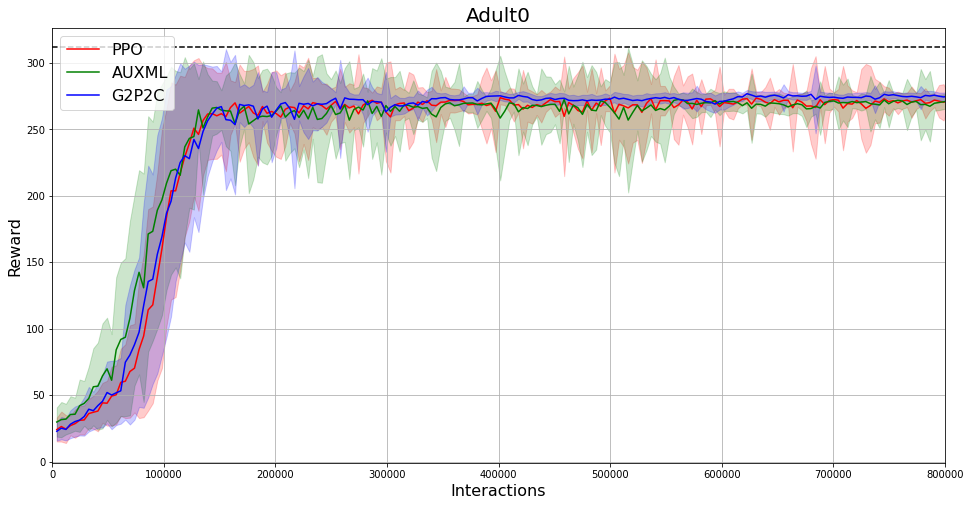

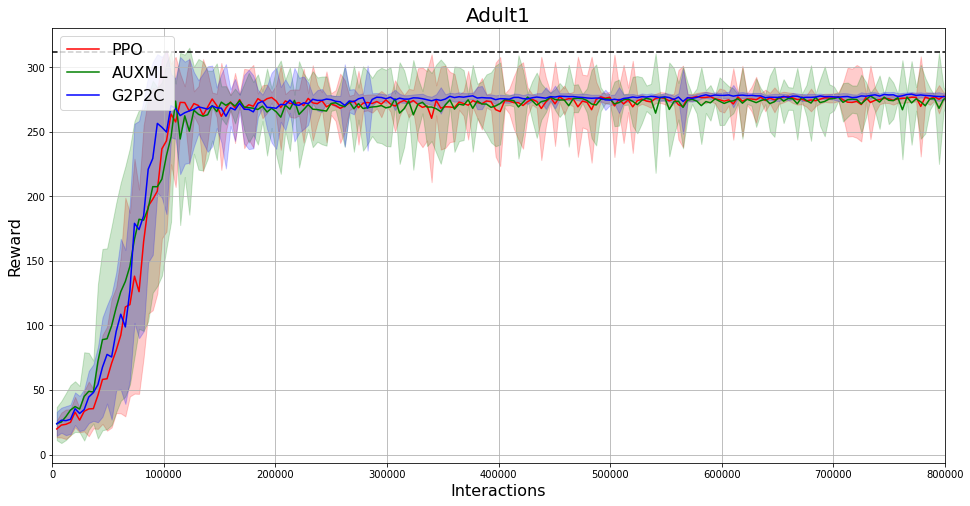

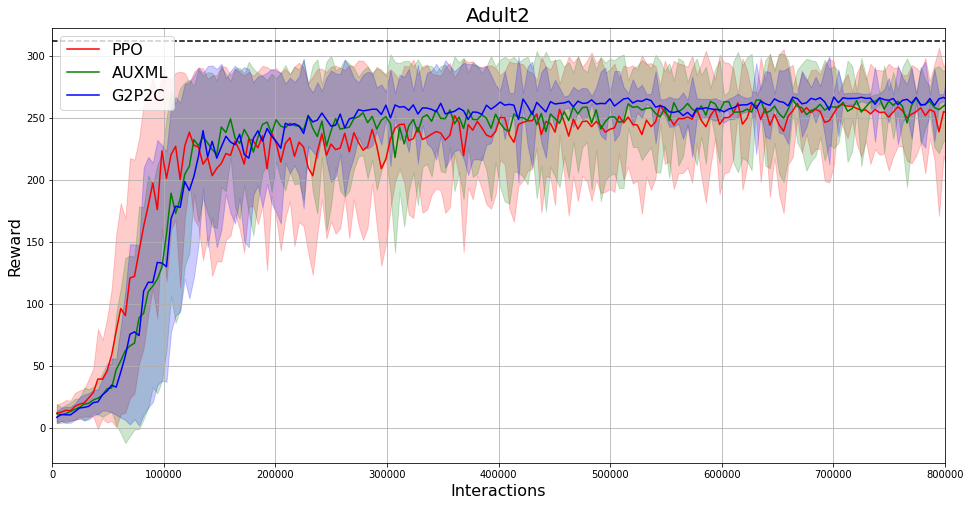

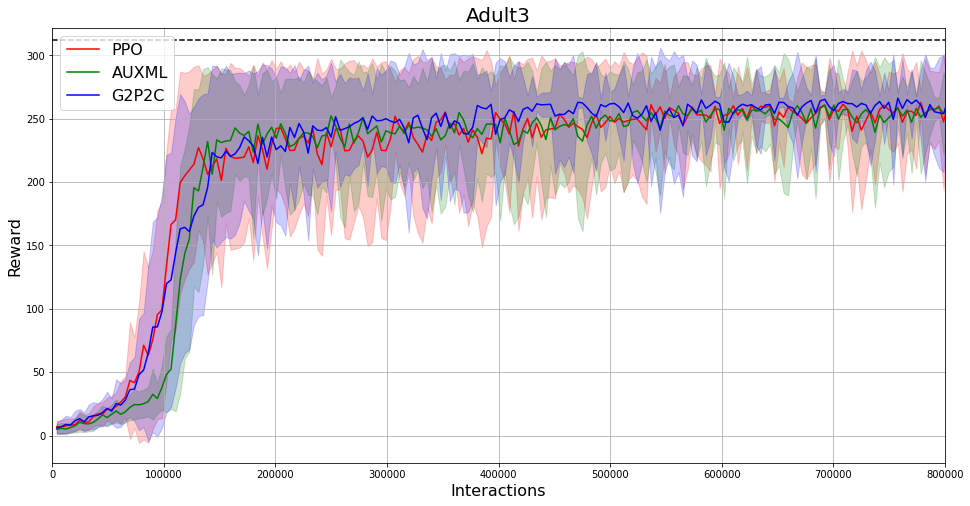

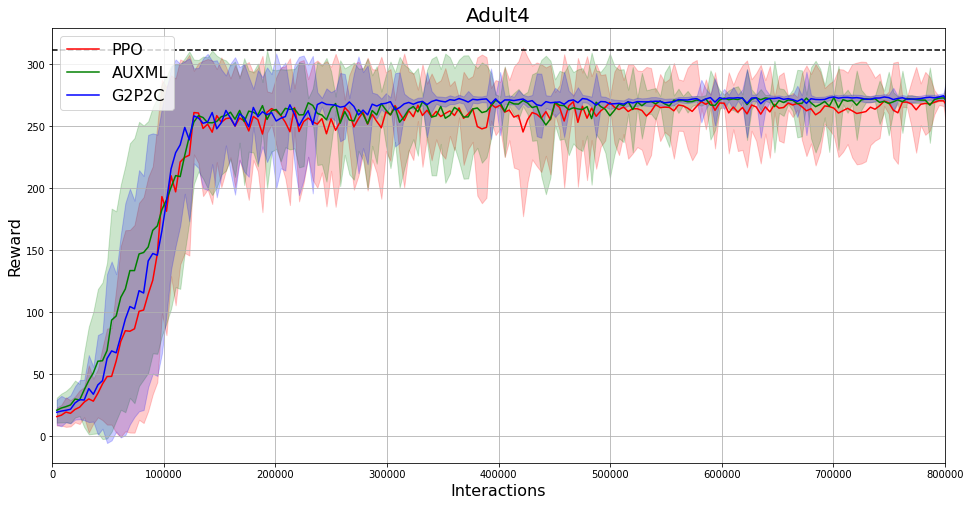

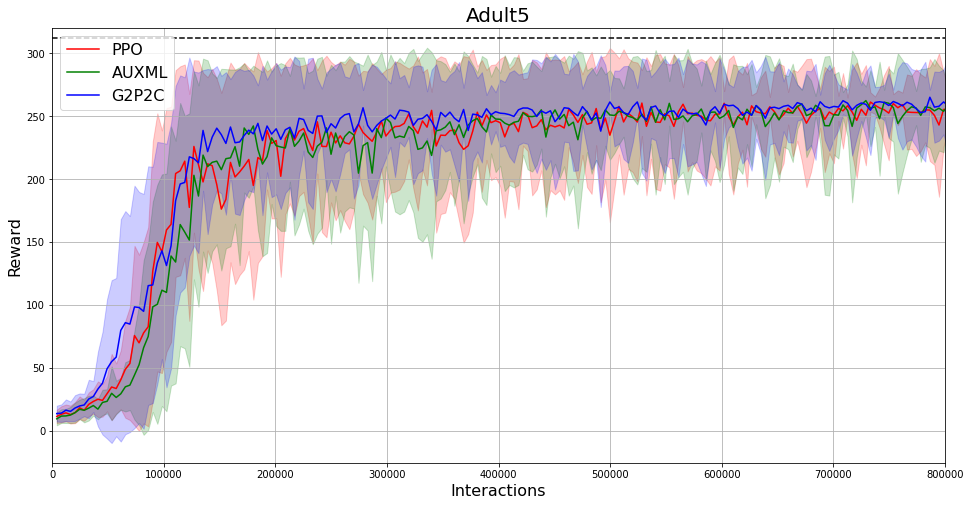

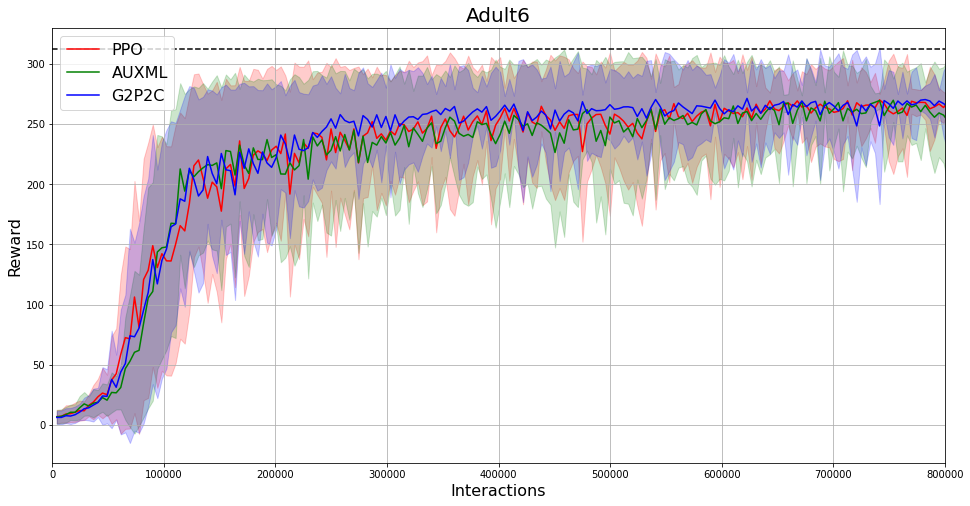

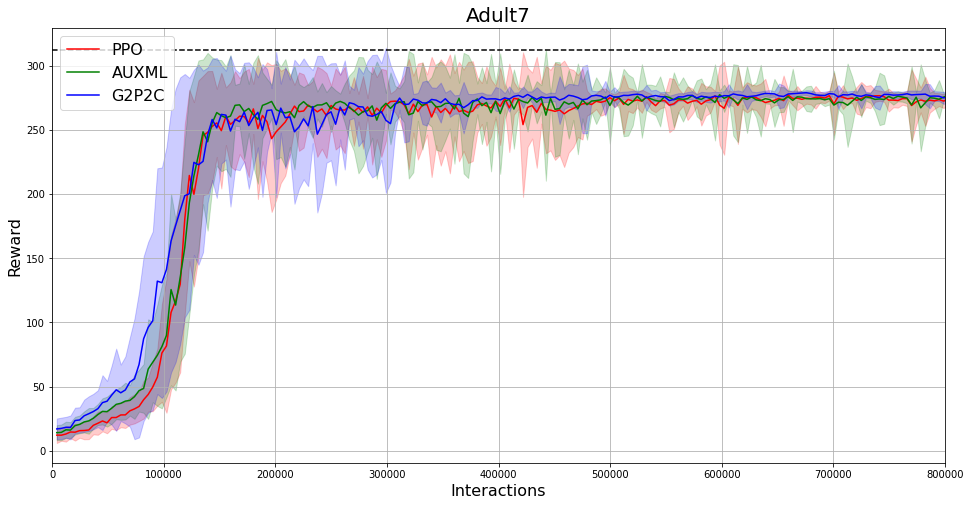

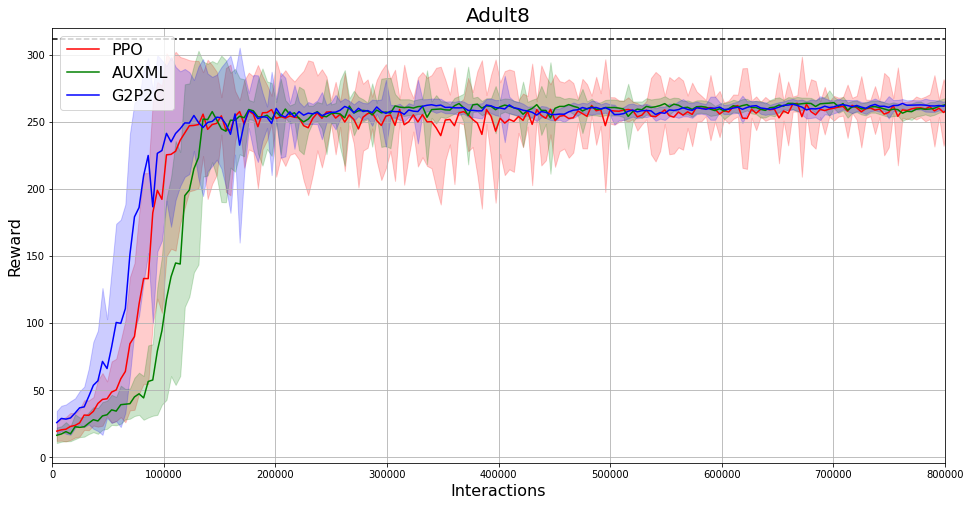

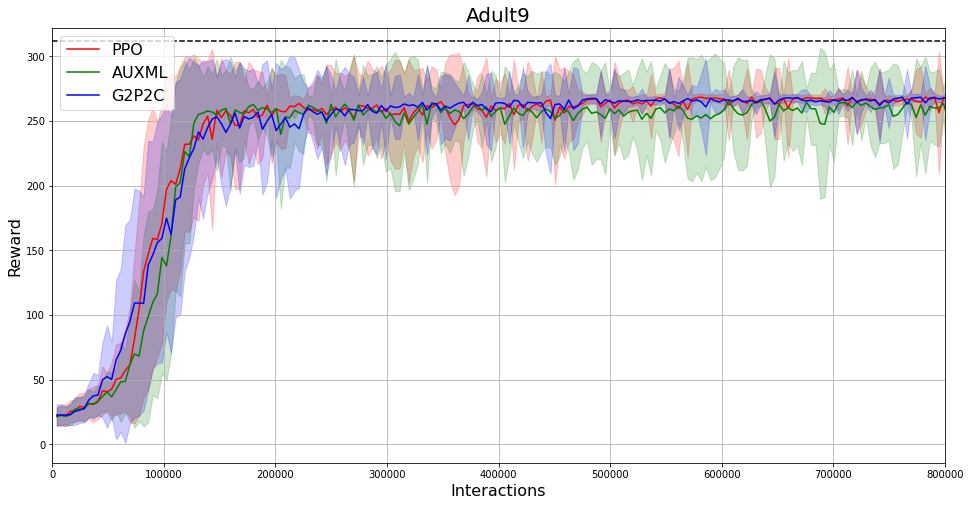

In [15]:
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
# MAIN_PATH = config('MAIN_PATH')
MAIN_PATH = '/home/users/u7041472/chirath/sys_control/'
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 


#FOLDER = '/May20/'
FOLDER = '/nci/May12/adult_easy/'

SUBJECT = '9'
subjects = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

for SUBJECT in subjects:

    ALGO1 = 'P'
    ALGO2 = 'A'
    ALGO3 = 'G'
    t = 'Adult' + SUBJECT
    PATH1 = FOLDER+ALGO1+SUBJECT 
    PATH2 = FOLDER+ALGO2+SUBJECT
    PATH3 = FOLDER+ALGO3+SUBJECT
    exp1 = ExperimentVisualise(id=PATH1+'_1', version=1.1, plot_version=1, test_seeds=5000)
    exp2 = ExperimentVisualise(id=PATH1+'_2', version=1.1, plot_version=1, test_seeds=5000)
    exp3 = ExperimentVisualise(id=PATH1+'_3', version=1.1, plot_version=1, test_seeds=5000)
    exp4 = ExperimentVisualise(id=PATH2+'_1', version=1.1, plot_version=1, test_seeds=5000)
    exp5 = ExperimentVisualise(id=PATH2+'_2', version=1.1, plot_version=1, test_seeds=5000)
    exp6 = ExperimentVisualise(id=PATH2+'_3', version=1.1, plot_version=1, test_seeds=5000)
    exp7 = ExperimentVisualise(id=PATH3+'_1', version=1.1, plot_version=1, test_seeds=5000)
    exp8 = ExperimentVisualise(id=PATH3+'_2', version=1.1, plot_version=1, test_seeds=5000)
    exp9 = ExperimentVisualise(id=PATH3+'_3', version=1.1, plot_version=1, test_seeds=5000)

    # plot the graphs
    command = []
    dis_len = 0.8 * 1000000
    disp_arr = display_commands_v2(command)
    exp_vis = {
                '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":'PPO'}, 
                '2':{ "id":exp2, "color":'r',"show": disp_arr[2], "label":'PPO'},  
                '3':{ "id":exp3, "color":'r',"show": disp_arr[3], "label":'PPO'}, 
                '4':{ "id":exp4, "color":'g',"show": disp_arr[4], "label":'AUXML'},  
                '5':{ "id":exp5, "color":'g',"show": disp_arr[5], "label":'AUXML'}, 
                '6':{ "id":exp6, "color":'g',"show": disp_arr[6], "label":'AUXML'},  
                '7':{ "id":exp7, "color":'b',"show": disp_arr[7], "label":'G2P2C'}, 
                '8':{ "id":exp8, "color":'b',"show": disp_arr[8], "label":'G2P2C'},
                '9':{ "id":exp9, "color":'b',"show": disp_arr[9], "label":'G2P2C'}
    }
    groups = [ ['1', '2', '3'],  ['4', '5', '6'], ['7', '8', '9']]
    plot_testing_average_metric(exp_vis, groups, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True, title=t)


    #plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='aBGP_rmse', goal=15, fill=False)